<a href="https://colab.research.google.com/github/Italoalberto/Hacker-de-Fiscalizacao-e-Analise-de-Dados/blob/main/Remunera%C3%A7%C3%A3o_Executivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Hacker de Fiscalização e Análise de Dados

Faça uma breve análise sobre a evolução da remuneração de servidores federais. Nosso objetivo é verificar sua capacidade de programação, análise de dados e de apresentação dos resultados

"Baseado na tabela em CSV com a série histórica 'Remuneração líquida média
mensal no Executivo civil federal ativo, por sexo e raça (1999-2020)',
disponível no site do Atlas do Estado Brasileiro (IPEA), comente uma ou duas
tendências da evolução da remuneração destes servidores de acordo com seu
sexo e/ou raça."

Dados obtidos em:

https://www.ipea.gov.br/atlasestado/filtros-series

# Importar dependências

In [3]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos

In [4]:
#liberando acesso do colab aos arquivos no Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# Carregar dados

In [5]:
#lendo o csv que contem as base de dados em dfs
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/6957-racasexo.csv', sep=';')

In [6]:
df.head(13)

,ano,raça,Fem,Mas,total,total_ano,fem_ano,mas_ano
0,1999,AMARELA,7319,8566,15885,477416,210314,267102
1,1999,BRANCA,105793,124198,229991,477416,210314,267102
2,1999,INDIGENA,530,1054,1584,477416,210314,267102
3,1999,NAO INFORMADO,32792,50004,82796,477416,210314,267102
4,1999,PARDA,54612,74169,128781,477416,210314,267102
5,1999,PRETA,9268,9111,18379,477416,210314,267102
6,2000,AMARELA,7249,8498,15747,462828,203748,259080
7,2000,BRANCA,104437,123495,227932,462828,203748,259080
8,2000,INDIGENA,523,1033,1556,462828,203748,259080
9,2000,NAO INFORMADO,28780,43736,72516,462828,203748,259080


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ano        132 non-null    int64 
 1   raça       132 non-null    object
 2   Fem        132 non-null    int64 
 3   Mas        132 non-null    int64 
 4   total      132 non-null    int64 
 5   total_ano  132 non-null    int64 
 6   fem_ano    132 non-null    int64 
 7   mas_ano    132 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.4+ KB


# Plotar gráficos

In [8]:
total_ano = df['total_ano']
ano = df['ano']

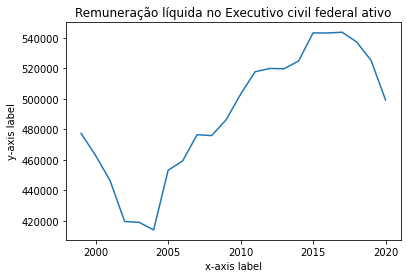

In [10]:
# plotar y (total_ano) vs x (ano)
plt.plot(ano, total_ano)

# adicionar título e legendas do x e y
plt.title('Remuneração líquida no Executivo civil federal ativo')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')

# desenhar o gráfico
plt.show()

raça
AMARELA          AxesSubplot(0.125,0.125;0.775x0.755)
BRANCA           AxesSubplot(0.125,0.125;0.775x0.755)
INDIGENA         AxesSubplot(0.125,0.125;0.775x0.755)
NAO INFORMADO    AxesSubplot(0.125,0.125;0.775x0.755)
PARDA            AxesSubplot(0.125,0.125;0.775x0.755)
PRETA            AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

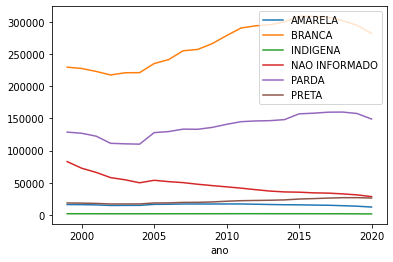

In [11]:
#definir o índice da coluna
df.set_index(ano, inplace=True)

#agrupar o dado por produto e desenhar um gráfico de linha
df.groupby('raça')['total'].plot(legend=True)

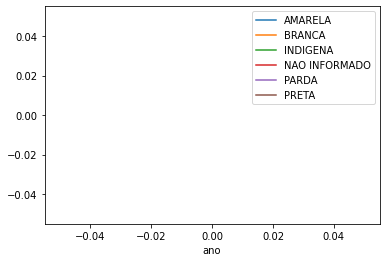

In [13]:
#definir o índice da coluna
df.set_index(ano, inplace=True)

#agrupar o dado por produto e desenhar um gráfico de linha
df.Mas = df.groupby('raça')['Mas'].plot(legend=True)

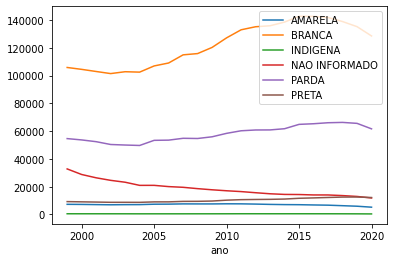

In [14]:
#definir o índice da coluna
df.set_index(ano, inplace=True)

#agrupar o dado por produto e desenhar um gráfico de linha
df.Fem = df.groupby('raça')['Fem'].plot(legend=True)

# Análise estatística

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ano,132.0,2009.500000,6.368458,1999.0,2004.0,2009.5,2015.00,2020.0
total,132.0,81578.181818,95817.636835,1298.0,15712.0,27432.5,137283.25,309320.0
total_ano,132.0,489469.090909,41303.037093,414170.0,459342.0,492797.0,524805.00,543665.0
fem_ano,132.0,216712.045455,17468.552011,189415.0,199621.0,215785.0,232731.00,241297.0
mas_ano,132.0,272757.045455,24243.967985,224755.0,259080.0,277012.0,291421.00,302368.0


In [16]:
df.corr()

,ano,total,total_ano,fem_ano,mas_ano
ano,1.000000,0.059493,0.828094,0.841367,0.804544
total,0.059493,1.000000,0.071843,0.070863,0.071336
total_ano,0.828094,0.071843,1.000000,0.986357,0.992940
fem_ano,0.841367,0.070863,0.986357,1.000000,0.959867
mas_ano,0.804544,0.071336,0.992940,0.959867,1.000000
